# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [6]:
# TODO: view the shape of your data
transactions.shape


(1000000, 10)

In [4]:
# TODO: Begin your EDA
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [5]:
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
transactions.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
transactions.describe

<bound method NDFrame.describe of             type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0        PAYMENT      983.09  C1454812978       36730.24        35747.15   
1        PAYMENT    55215.25  C1031766358       99414.00        44198.75   
2        CASH_IN   220986.01  C1451868666     7773074.97      7994060.98   
3       TRANSFER  2357394.75   C458368123           0.00            0.00   
4       CASH_OUT    67990.14  C1098978063           0.00            0.00   
...          ...         ...          ...            ...             ...   
999995   PAYMENT    13606.07   C768838592      114122.11       100516.04   
999996   PAYMENT     9139.61  C1912748675           0.00            0.00   
999997  CASH_OUT   153650.41  C1494179549       50677.00            0.00   
999998  CASH_OUT   163810.52   C116856975           0.00            0.00   
999999  CASH_OUT    51379.41  C2103541974       45503.43            0.00   

           nameDest  oldbalanceDest  newbalanceDest  

In [71]:
transactions["isFraud"].value_counts()

isFraud
0    998703
1      1297
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

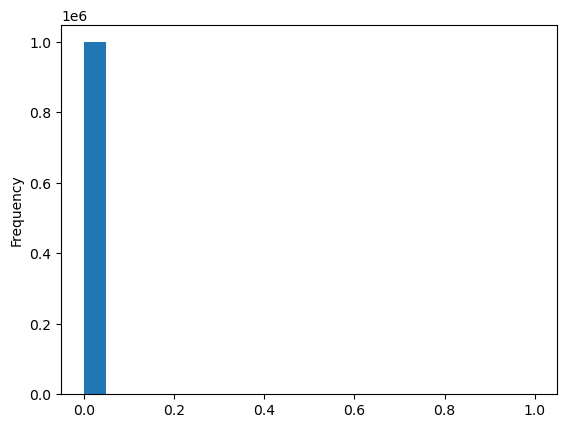

In [60]:
transactions["isFraud"].plot.hist(bins=20)


In [72]:
transactions["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    999999
1         1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

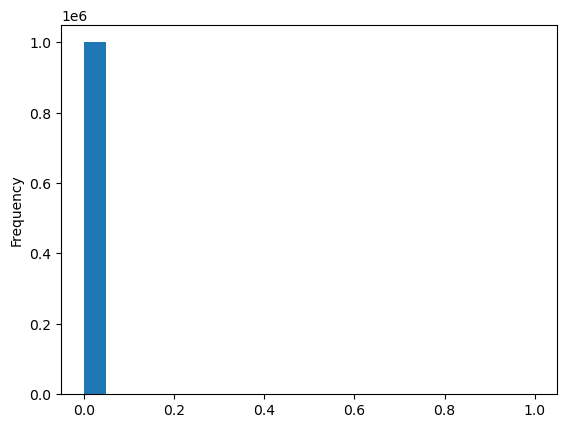

In [61]:
transactions["isFlaggedFraud"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

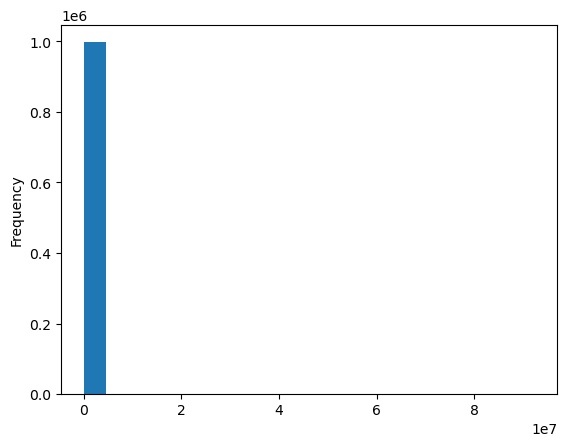

In [66]:
transactions["amount"].plot.hist(bins=20)

<Axes: xlabel='type', ylabel='count'>

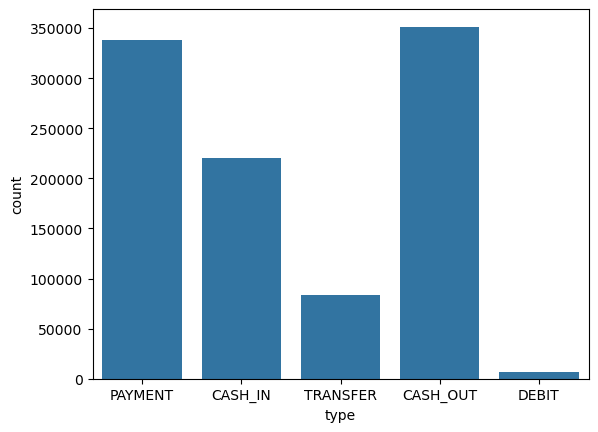

In [64]:
#Count the number of each type of transaction
sns.countplot(data=transactions, x="type")

In [25]:
transactions.groupby("type")["amount"].count()

type
CASH_IN     219955
CASH_OUT    351360
DEBIT         6417
PAYMENT     338573
TRANSFER     83695
Name: amount, dtype: int64

In [26]:
transactions.groupby("type")["amount"].mean()

type
CASH_IN     168928.914668
CASH_OUT    175584.659320
DEBIT         5445.890813
PAYMENT      13055.592085
TRANSFER    911827.155179
Name: amount, dtype: float64

<Axes: ylabel='type'>

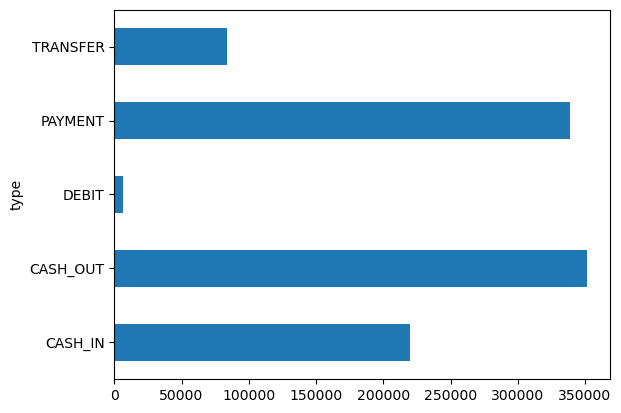

In [67]:
transactions.groupby("type")["amount"].count().plot.barh()

In [68]:
transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


## Bivariate Analysis Section
Further exploring the data to find correlations between the different columns and the transactions to find patterns and identify the fraud transactions

<Axes: xlabel='type'>

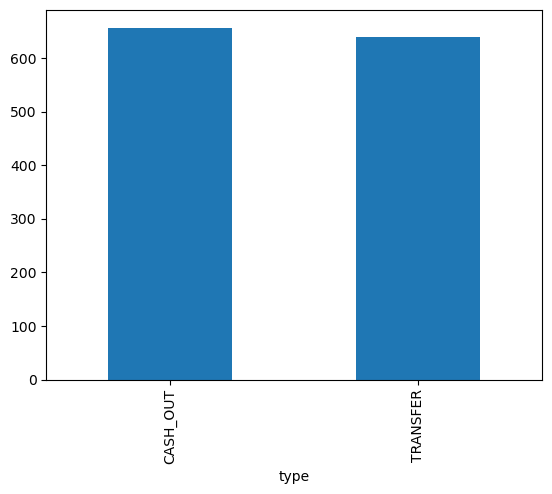

In [73]:
#Countplot to find the distribution of the type of transactions commonly used to commit fraudulent transactions

fraud_df = transactions[transactions["isFraud"] == 1]
fraud_df["type"].value_counts().plot(kind="bar")


(0.0, 1000000.0)

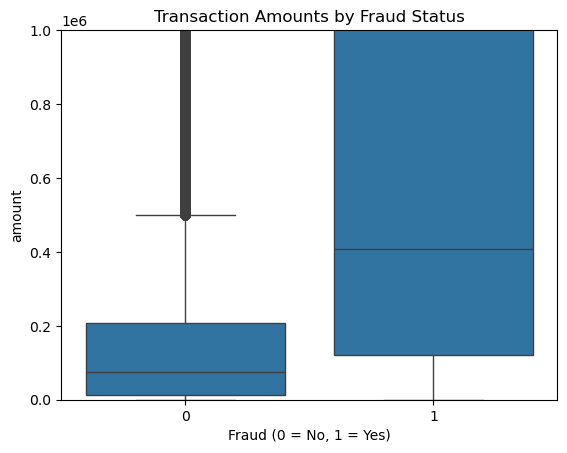

In [77]:
#Comparing the amounts of each transactions and if they are classified as fraud or not
sns.boxplot(data=transactions, x="isFraud", y="amount")
plt.xlabel("Fraud (0 = No, 1 = Yes)")

plt.ylim(0, 1e6) 

<Axes: xlabel='amount', ylabel='type'>

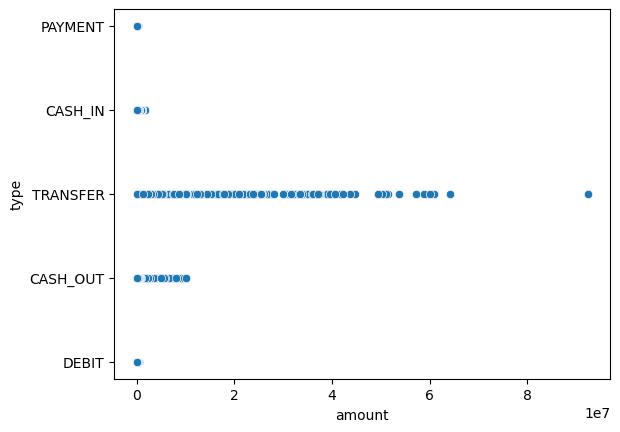

In [79]:
#Scatterplot to show the correlation between the amount of money per transaction and the type of transaction it is.
sns.scatterplot(data=transactions, x="amount", y="type")

<Axes: >

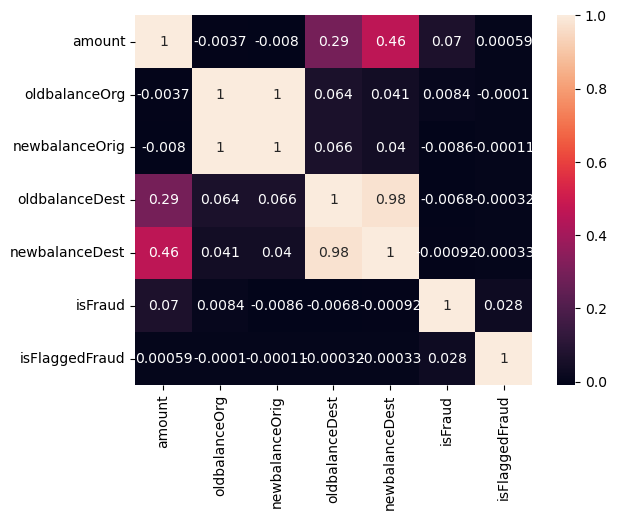

In [86]:
sns.heatmap(transactions.corr(numeric_only=True), annot=True)


In [90]:
transactions[["oldbalanceOrg", "newbalanceOrig"]].corr()


,oldbalanceOrg,newbalanceOrig
oldbalanceOrg,1.000000,0.998878
newbalanceOrig,0.998878,1.000000


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.


All of the columns tested were highly **right-skewed**. The histograms also showed how most values were clustered near zero, with long bars growing towards larger values. This could mean that most transactions had relatively small amounts which suggest minor transfers or withdrawals. However, the *rare transactions* involved large amounts which indicates high-value customers or potential fraudulent activities. 

Based on the observations, it can be concluded that the activity is normal for financial institutions where small transactions are common and the high value ones are rare and call for analyzing. 

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.


One interesting pattern I've noticed when observing the data was the relation between **isFraud** and **amount** which was seen in the *boxplot*. Although fraudulent transactions were rare, they appear to concentrate around higher transaction amounts. Another correlation was found comparing destination account balances; (**oldbalanceDest** and **newbalanceDest**) with transactions amounts. The correlation according to the *heatmap* was moderately positive suggesting the fraudulent transactions often target or end up in accounts with higher balances. 

This could be to mask large transfers or movement of large sums of funds. 

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

The transaction types had differences that emerged in the typical amounts involved. Types like **transfer** and **cash-out** had the highest averages often involving larger sums than other types. This observation can be explained by fraudulent activity involving movement of large sums of money out of an account.

The other types like **cash-in**, **debit** and **payment** having smaller amounts of money can be explained as everyday customer transaction which are less likely to be flagged or associated with fraudulent behavior

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.


Yes, transaction amounts vary significantly when comparing fraudulent and non-fraudulent transactions across different types of transactions. Based on the **countplot** for **fraud** and **type**; the results returned showed a distinct pattern that fraud transactions tend to involve large amounts especially in *transfers* and *cash-outs*.

The *average fraud transfers* were significantly higher than non-fraudulent transfers while fraud cash-outs also skewed towards higher amounts. In contrast, types such as **payment**, **cash-in**, and **debit** had *little to no fraud activity*, and their transaction amounts were generally lower and more consistent regardless of fraud status. 

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.


The system's built-in *fraud flag* does a **very poor job** at identifying actual fraud transactions. Out of the entire dataset, only *one* transaction was flagged as fraud while there was **over 1200 transactions** that were actual fraud based on the [.value_counts()] test I ran. This means that over 99.9% of fraud that occurred was failed to be flagged by the system. 

These findings highlight the need for a more nuanced, data-driven approach to fraud detection, as relying on static rules alone results in extremely low recall and offers little real protection against fraud.